In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

import joblib

print("libraries loaded sucessfully")

libraries loaded sucessfully


In [4]:
df = sns.load_dataset("tips")
print (df.head(20))

    total_bill   tip     sex smoker  day    time  size
0        16.99  1.01  Female     No  Sun  Dinner     2
1        10.34  1.66    Male     No  Sun  Dinner     3
2        21.01  3.50    Male     No  Sun  Dinner     3
3        23.68  3.31    Male     No  Sun  Dinner     2
4        24.59  3.61  Female     No  Sun  Dinner     4
5        25.29  4.71    Male     No  Sun  Dinner     4
6         8.77  2.00    Male     No  Sun  Dinner     2
7        26.88  3.12    Male     No  Sun  Dinner     4
8        15.04  1.96    Male     No  Sun  Dinner     2
9        14.78  3.23    Male     No  Sun  Dinner     2
10       10.27  1.71    Male     No  Sun  Dinner     2
11       35.26  5.00  Female     No  Sun  Dinner     4
12       15.42  1.57    Male     No  Sun  Dinner     2
13       18.43  3.00    Male     No  Sun  Dinner     4
14       14.83  3.02  Female     No  Sun  Dinner     2
15       21.58  3.92    Male     No  Sun  Dinner     2
16       10.33  1.67  Female     No  Sun  Dinner     3
17       1

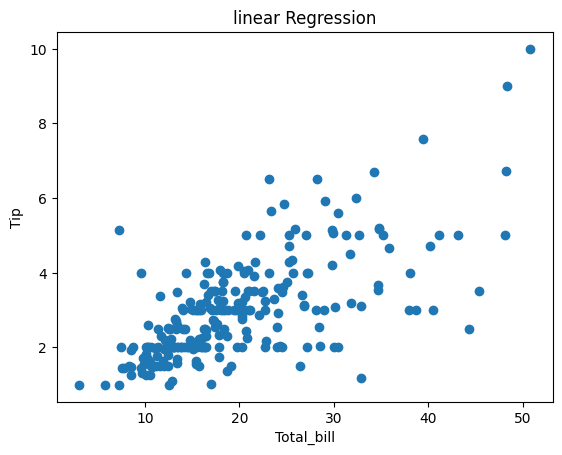

In [5]:
# visualize the data 
plt.scatter(df["total_bill"], df["tip"])
plt.title("linear Regression")
plt.xlabel("Total_bill")
plt.ylabel("Tip")
plt.show()

In [6]:
# Split data into features (x) and target (y)
x = df[["total_bill"]]
y = df[["tip"]]

# Split our data into training and testing 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
# building the model
# create and train the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(x_test)

In [9]:
print(f"slope (m): {model.coef_[0]}")
print(f"intercept (b): {model.intercept_}")

slope (m): [0.10696371]
intercept (b): [0.92523556]


In [10]:
# evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error:  {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R_Squared Score: {r2:.2f}")

Mean Squared Error:  0.57
Root Mean Squared Error: 0.75
R_Squared Score: 0.54


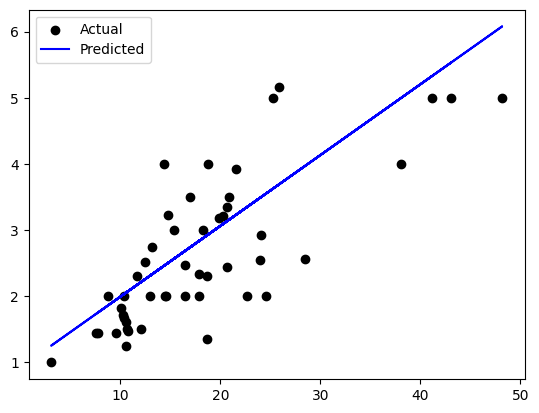

In [11]:
# visualize the predicted price vs the actual price 
plt.scatter(x_test, y_test, color='black', label="Actual")
plt.plot(x_test, y_pred, color='blue', label="Predicted")
plt.legend()
plt.show()

In [12]:
# saving model
joblib.dump(model, "House_price_predictor.joblip")

['House_price_predictor.joblip']

In [13]:
# import and use model
loaded_model = joblib.load("House_price_predictor.joblip")

In [14]:
new_house = [[1000]]
predicted_price = loaded_model.predict(new_house)
print(f"predicted price: N {predicted_price[0]}")



predicted price: N [107.88894241]


C:\Users\THEO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
